Import required packages

In [1]:
%pylab inline
import math, re, json, requests
from google.protobuf import json_format

Populating the interactive namespace from numpy and matplotlib


In [2]:
from google.transit import gtfs_realtime_pb2
import requests
import pandas as pd

In [3]:
from datetime import datetime
import time
from pytz import timezone

# Trip updates

URL and credential for Translink GTFS-Realtime

In [4]:
baseURL = 'http://gtfs.translink.ca/gtfsrealtime?apikey='
apikey = 'EuqbS0U1AatCOXictFZd'

In [5]:
feed = gtfs_realtime_pb2.FeedMessage()
response = requests.get(baseURL + apikey)

In [6]:
feed.ParseFromString(response.content)

In [7]:
for j in range(10):
    print('Entity {}'.format(j))
    print(feed.entity[j], end='\r')
    print()

Entity 0
id: "9032187"
trip_update {
  trip {
    trip_id: "9032187"
  }
  stop_time_update {
    departure {
      delay: 0
    }
    stop_id: "22"
  }
  vehicle {
    id: "9581"
    label: "9581"
  }
  timestamp: 1498604951
}

Entity 1
id: "9018039"
trip_update {
  trip {
    trip_id: "9018039"
  }
  stop_time_update {
    departure {
      delay: -120
    }
    stop_id: "29"
  }
  vehicle {
    id: "9568"
    label: "9568"
  }
  timestamp: 1498604951
}

Entity 2
id: "9046033"
trip_update {
  trip {
    trip_id: "9046033"
  }
  stop_time_update {
    departure {
      delay: 600
    }
    stop_id: "36"
  }
  vehicle {
    id: "9663"
    label: "9663"
  }
  timestamp: 1498604951
}

Entity 3
id: "9020703"
trip_update {
  trip {
    trip_id: "9020703"
  }
  stop_time_update {
    departure {
      delay: 0
    }
    stop_id: "48"
  }
  vehicle {
    id: "2109"
    label: "2109"
  }
  timestamp: 1498604951
}

Entity 4
id: "9017953"
trip_update {
  trip {
    trip_id: "9017953"
  }
  stop

In [8]:
feed.entity[0]

id: "9032187"
trip_update {
  trip {
    trip_id: "9032187"
  }
  stop_time_update {
    departure {
      delay: 0
    }
    stop_id: "22"
  }
  vehicle {
    id: "9581"
    label: "9581"
  }
  timestamp: 1498604951
}

In [9]:
trip_updates = [json_format.MessageToDict(entity.trip_update) 
                for entity in feed.entity 
                if entity.HasField('trip_update')]

In [21]:
def tryIntCoerce(x):
    try:
        x = int(x)
    except ValueError as ve:
        pass
    return x

In [22]:
def stripDelay(tu, verbose=False):
    try: 
        return {'departure_delay' : tryIntCoerce(tu['stopTimeUpdate'][0]['departure']['delay']),
                'stopId' : tryIntCoerce(tu['stopTimeUpdate'][0]['stopId']), 
                'timestamp' : tryIntCoerce(tu['timestamp']), 
                'tripId' : tryIntCoerce(tu['trip']['tripId']), 
                'vehicle' : tryIntCoerce(tu['vehicle']['id'])}
    except KeyError as e:
        if verbose:
            print(e)
            print(tu)
            print('')
        return False

In [23]:
delays = []
not_delays = []
for tu in trip_updates:
    sd = stripDelay(tu)
    if sd:
        delays.append(sd)
    else:
        not_delays.append(tu)

In [24]:
print('number of trip updates: {}'.format(len(trip_updates)))
print('number of delays: {}'.format(len(delays)))
print('number of other trip_updates: {}'.format(len(not_delays)))

number of trip updates: 1123
number of delays: 1061
number of other trip_updates: 62


In [25]:
delays[0]

{'departure_delay': 0,
 'stopId': 22,
 'timestamp': 1498604951,
 'tripId': 9032187,
 'vehicle': 9581}

In [26]:
delay_df = pd.DataFrame(delays)

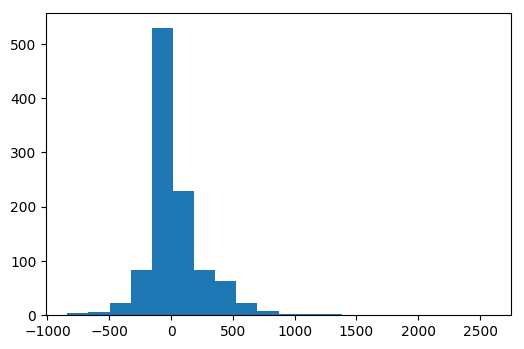

In [30]:
plt.hist(delay_df['departure_delay'], bins=20);

In [33]:
from scipy.stats import mode

In [34]:
np.unique(delay_df.stopId).size

860

In [35]:
mode(delay_df.stopId)

ModeResult(mode=array([10929]), count=array([7]))

In [36]:
pd.value_counts(delay_df.stopId)

10929    7
5593     5
11805    5
11270    5
10706    5
6456     5
6467     5
6197     5
6578     5
11638    4
8649     4
8324     4
76       4
1856     4
8283     4
11252    4
95       4
1907     3
9487     3
5042     3
7096     3
80       3
11499    3
5815     3
3023     3
423      3
6572     3
4242     3
6914     3
386      3
        ..
1176     1
1173     1
1171     1
5266     1
11409    1
1237     1
11478    1
3731     1
11526    1
12172    1
1308     1
1301     1
9486     1
6482     1
7434     1
9481     1
7432     1
11527    1
11523    1
3296     1
11519    1
5370     1
9464     1
8740     1
11501    1
5352     1
1254     1
9445     1
1250     1
4096     1
Name: stopId, Length: 860, dtype: int64

# Position updates

cf. Python file

# Potential Questions

Compute the distribution of the delays. 
 * What would you expect the distribution to be? 
 * How far is it from being a normal distribution? 
 * What route has the most delays? 
 * What stop is the worst for delays? (How are you measuring "worst"?)

